In [2]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv('wine.csv')
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


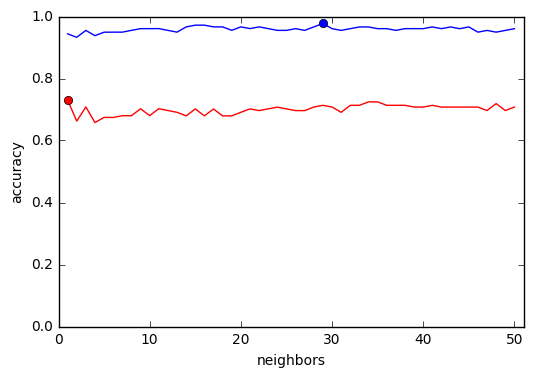

k_max without scaling = <1>
max score without scaling = <0.73>
k_max with scaling = <29>
max score with scaling = <0.98>


In [2]:
X = data.as_matrix()
y = X[:, 0]
X = np.delete(X, [0], axis=1)

kf = KFold(len(X), n_folds=5, shuffle=True, random_state=42)

accuracy = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy.append(np.mean(cross_val_score(estimator=neigh, X=X, y=y, cv=kf)))

accuracy_scaled = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy_scaled.append(np.mean(cross_val_score(estimator=neigh, X=scale(X), y=y, cv=kf)))

x = range(1,51)
plt.plot(x, accuracy, 'r')
plt.plot(x, accuracy_scaled, 'b')
plt.plot(np.argmax(accuracy) + 1, np.amax(accuracy), 'ro')
plt.plot(np.argmax(accuracy_scaled) + 1, np.amax(accuracy_scaled), 'bo')
plt.ylabel('accuracy')
plt.xlabel('neighbors')
plt.axis([0, 51, 0, 1])
plt.show()
print 'k_max without scaling = <{}>'.format(np.argmax(accuracy) + 1)
print 'max score without scaling = <{}>'.format(round(np.amax(accuracy), 2))
print 'k_max with scaling = <{}>'.format(np.argmax(accuracy_scaled) + 1)
print 'max score with scaling = <{}>'.format(round(np.amax(accuracy_scaled), 2))